In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
 

In [2]:
df=pd.read_csv('E:/NTI/car_data.csv')
print(df.shape)
df.head()

(1000, 5)


,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


In [3]:
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

In [4]:
df = df.drop(['Gender', 'User ID'], axis=1)

In [5]:
X=df.iloc[:,0:2]
X

,Age,AnnualSalary
0,35,20000
1,40,43500
2,49,74000
3,40,107500
4,25,79000
...,...,...
995,38,59000
996,47,23500
997,28,138500
998,48,134000


In [40]:
y=df.iloc[:,2]
y

0      0
1      0
2      0
3      1
4      0
      ..
995    0
996    0
997    1
998    1
999    0
Name: Purchased, Length: 1000, dtype: int64

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [42]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [43]:
C=1
#clf=SVC(C=C,kernel="linear")
clf=SVC(C=C)
clf.fit(X_train,y_train)

SVC(C=1)

In [44]:
y_pred=clf.predict(X_test)
y_pred[0:10]

array([0, 1, 0, 1, 1, 1, 1, 0, 0, 0], dtype=int64)

In [45]:
accuracy_score(y_test,y_pred)

0.92

In [46]:
y_test

521    0
737    1
740    0
660    1
411    0
      ..
408    0
332    0
208    1
613    0
78     1
Name: Purchased, Length: 200, dtype: int64

In [47]:
y1 = np.array([-1 if l==0  else 1 for l in y_test])



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


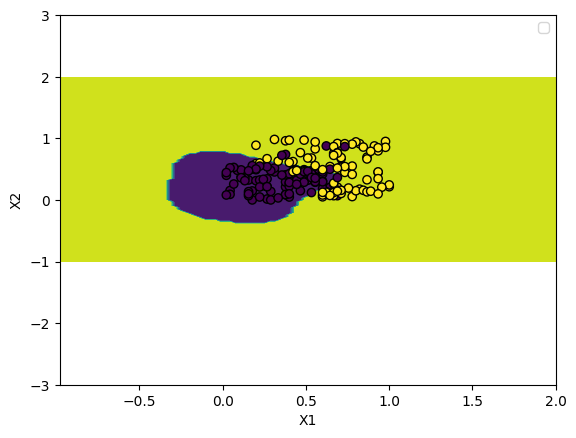

In [51]:
DecisionBoundaryDisplay.from_estimator(  clf, X_test, response_method="predict",
      xlabel="feature1", ylabel="feature2")
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k')
 
plt.xlabel("X1")
plt.ylabel("X2")
plt.ylim(-3,3)
plt.legend()
plt.show()

In [49]:
from sklearn.metrics import hinge_loss
hinge_loss(y1, clf.decision_function(X_test))


0.2223183060425133

In [27]:
y_pred_dec=clf.decision_function(X_test)
y_pred_dec[0:10]

array([ 2866.69969516,  -601.62720914, -1609.7353024 ,  1457.65416293,
        -137.15186734,  -750.23542447,  2913.55842929, -7060.0087399 ,
       -2017.49702115, -3606.39008756])

In [28]:
y_pred_sign=np.sign(y_pred_dec)
y_pred_sign[0:10]

array([ 1., -1., -1.,  1., -1., -1.,  1., -1., -1., -1.])

In [29]:
y_pred1=[0 if l==-1 else 1 for l in y_pred_sign]
y_pred1[0:10]

[1, 0, 0, 1, 0, 0, 1, 0, 0, 0]

In [30]:
w=clf.coef_

In [31]:
b = clf.intercept_

In [32]:
y_pred2=np.dot(X_test,w.T)+b
y_pred2[0:10]

array([[ 2866.69969876],
       [ -601.6272034 ],
       [-1609.73534131],
       [ 1457.65414234],
       [ -137.15187001],
       [ -750.23556815],
       [ 2913.55836741],
       [-7060.00872391],
       [-2017.49704147],
       [-3606.39007507]])

In [33]:
y_pred3=[0 if l<-1 else 1 for l in y_pred2]
y_pred3[0:10]

[1, 0, 0, 1, 0, 0, 1, 0, 0, 0]

In [34]:
# plt.scatter(X_test[:,0][y_test==0], X_test[:,1][y_test==0], label="0",  c='green')
# plt.scatter(X_test[:,0][y_test==1], X_test[:,1][y_test==1], label="1",  c='red')
 
# plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
 
 
for  j in np.unique(y):
 plt.scatter(X_test[:,0][y_test==j], X_test[:,1][y_test== j], label=j)
 
x_points = X_test[:,0]
y_points = -(w[0] / w[1]) * x_points - b / w[1]  # getting corresponding y-points
plt.plot(x_points, y_points, c='blue');
plt.xlabel(df.columns[2])
plt.ylabel(df.columns[3])
plt.ylim(-3,3)
plt.legend()
plt.show()
 

InvalidIndexError: (slice(None, None, None), 0)

In [35]:
# لو y_test و X_test من نوع DataFrame أو Series، الأفضل التأكد من تطابق الفهارس
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# رسم النقاط لكل فئة في y
for j in np.unique(y_test):
    plt.scatter(X_test.iloc[y_test == j, 0], X_test.iloc[y_test == j, 1], label=str(j))

# رسم خط الفصل
x_points = X_test.iloc[:, 0]
y_points = -(w[0] / w[1]) * x_points - b / w[1]
plt.plot(x_points, y_points, c='blue')

# إعدادات الرسم
plt.xlabel(df.columns[2])
plt.ylabel(df.columns[3])
plt.ylim(-3, 3)
plt.legend()
plt.show()


IndexError: DataFrame indexer is not allowed for .iloc
Consider using .loc for automatic alignment.

In [36]:
from sklearn.inspection import DecisionBoundaryDisplay
DecisionBoundaryDisplay.from_estimator(  clf, X_test, response_method="predict",xlabel=df.columns[2], ylabel=df.columns[3])
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k')
# plt.xlabel(df.columns[2])
# plt.ylabel(df.columns[3])
# plt.ylim(-3,3)
plt.legend()
plt.show()
 

IndexError: index 3 is out of bounds for axis 0 with size 3